In [1]:
%reload_ext nb_black

<IPython.core.display.Javascript object>

In [2]:
import numpy as np
import pandas as pd

from sklearn.datasets import load_boston
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeRegressor, plot_tree

import seaborn as sns
import matplotlib.pyplot as plt

%matplotlib inline

boston_data = load_boston()

<IPython.core.display.Javascript object>

In [3]:
def eval_preds(y_true, y_pred):
    """Display some metrics for evaluating regression predictions"""
    error = y_true - y_pred

    rmse = np.mean(np.sqrt((error ** 2)))
    mae = np.mean(np.abs(error))
    mape = np.mean(np.abs((error / y_true)))

    print(f"rmse {rmse:.2f}")
    print(f"mae {mae:.2f}")
    print(f"mape {mape:.2f}")

    line_pts = [np.min(y_true), np.max(y_true)]
    plt.scatter(y_true, y_pred)
    plt.plot(line_pts, line_pts, c="red", ls="--", alpha=0.5)
    plt.xlabel("Actual")
    plt.ylabel("Fit")
    plt.show()

<IPython.core.display.Javascript object>

* Investigate `boston_data` what are we working with.
* How could we put this in a dataframe with column names?
* What are we predicting?

In [7]:
X = pd.DataFrame(boston_data["data"], columns=boston_data["feature_names"])
y = boston_data['target']


<IPython.core.display.Javascript object>

* Train test split

In [9]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)


<IPython.core.display.Javascript object>

* Fit a `DecisionTreeRegressor` with default hyperparameters and report the train and test scores

In [10]:
model = DecisionTreeRegressor()

model.fit(X_train, y_train)

DecisionTreeRegressor(ccp_alpha=0.0, criterion='mse', max_depth=None,
                      max_features=None, max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, presort='deprecated',
                      random_state=None, splitter='best')

<IPython.core.display.Javascript object>

* How are we performing?

In [11]:
model.score(X_train, y_train)

1.0

<IPython.core.display.Javascript object>

* I put a helper function named `eval_preds()` at the top of this notebook.  Apply it to evaluate our model.

In [ ]:
y_pred = _____
eval_preds(y_test, y_pred)

* Plot the decision tree (we'll just use `plot_tree` here instead of pydotplus). This will take a while...

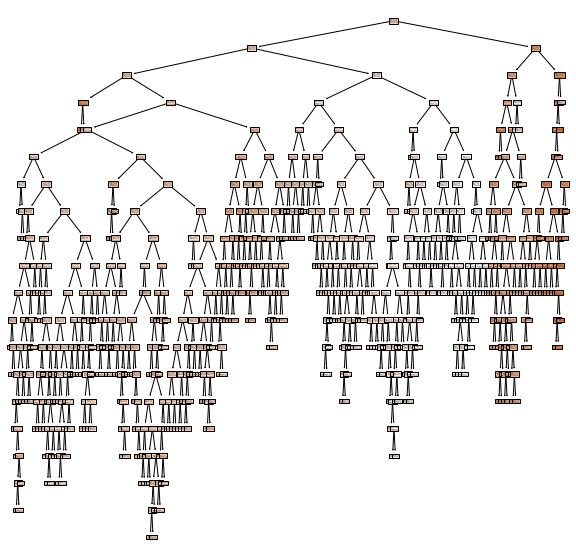

Wall time: 18.5 s


<IPython.core.display.Javascript object>

In [12]:
%%time
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

-----

#### Group 1

* Adjust the hyperparameters of `max_depth` & `min_samples_leaf`
* Re-fit, re-score, and re-plot the model.  How did these change the output?
* Be prepared for someone to try and explain what these hyperparameters are doing (things you might tell us about)
  * how the params relate to over/under fitting (i.e. the higher/lower the `max_depth` the more over/under fit the model becomes)
  * how the params change the look of the tree in the plot
  * how the params are described in the sklearn documentation (paraphrased to plainer english)

#### Group 2

* Adjust the hyperparameters of `max_leaf_nodes` & `min_samples_split`
* Re-fit, re-score, and re-plot the model.  How did these change the output?
* Be prepared for someone to try and explain what these hyperparameters are doing (things you might tell us about)
  * how the params relate to over/under fitting (i.e. the higher/lower the `max_leaf_nodes` the more over/under fit the model becomes)
  * how the params change the look of the tree
  * how the params are described in the sklearn documentation (paraphrased to plainer english)

In [20]:
X_test.shape

(102, 13)

<IPython.core.display.Javascript object>

In [28]:
model = DecisionTreeRegressor(max_depth= 10, min_samples_leaf=5 )



<IPython.core.display.Javascript object>

In [25]:
model.fit(X_train, y_train)
model.score(X_train, y_train)

0.8417751710231924

<IPython.core.display.Javascript object>

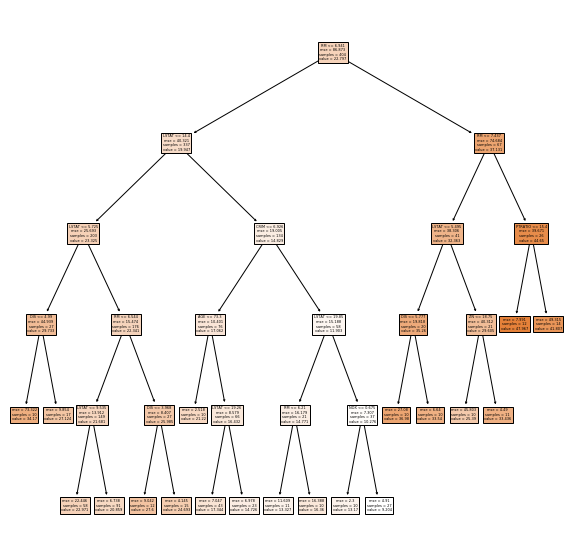

Wall time: 985 ms


<IPython.core.display.Javascript object>

In [26]:
%%time
plt.figure(figsize=(10, 10))
plot_tree(model, filled=True, feature_names=X_train.columns)
plt.show()

In [27]:
model.score(X_test, y_test)

0.7650921612754652

<IPython.core.display.Javascript object>

In [32]:
# max_depth
for i in range(1, 10, 2):
    model = DecisionTreeRegressor(max_depth=i, random_state=42)
    model.fit(X_train, y_train)
    print(f"For max_depth {i}, train score is: {model.score(X_train, y_train)}")
    print(f"For max_depth {i}, test score is: {model.score(X_test, y_test)}")

For max_depth 1, train score is: 0.4702641397327912
For max_depth 1, test score is: 0.36021569828883965
For max_depth 3, train score is: 0.8169563604769107
For max_depth 3, test score is: 0.7713663958398644
For max_depth 5, train score is: 0.9185171013474737
For max_depth 5, test score is: 0.8833565347917995
For max_depth 7, train score is: 0.9625182307864071
For max_depth 7, test score is: 0.8772230065445347
For max_depth 9, train score is: 0.9869725918192362
For max_depth 9, test score is: 0.7195494701055003


<IPython.core.display.Javascript object>

In [35]:
for j in range(3, 12, 3):
    model = DecisionTreeRegressor(max_depth=7, min_samples_leaf=j, random_state=42)
    model.fit(X_train, y_train)
    print(f"For min_samples_leaf {j}, train score is: {model.score(X_train, y_train)}")
    print(f"For min_samples_leaf {j}, test score is: {model.score(X_test, y_test)}")

For min_samples_leaf 3, train score is: 0.9353702385699579
For min_samples_leaf 3, test score is: 0.8847578253578586
For min_samples_leaf 6, train score is: 0.8766859955447028
For min_samples_leaf 6, test score is: 0.7941117969883809
For min_samples_leaf 9, train score is: 0.8648043882994599
For min_samples_leaf 9, test score is: 0.7754315746374281


<IPython.core.display.Javascript object>